In [16]:
import pandas as pd

df = pd.read_csv('data/accounts_filtered_and_clustered_20190424.csv')

In [18]:
pd.options.display.max_columns = None

In [17]:
clusters = df.groupby('clusters')

In [4]:
clusters.count()

id    name  auths_owner_count  auths_active_count  \
clusters                                                          
0         172892  172892             172892              172892   
1           4966    4966               4966                4966   
2           2658    2658               2658                2658   
3          65341   65341              65341               65341   
4              9       9                  9                   9   
5            192     192                192                 192   
6             48      48                 48                  48   
7            623     623                623                 623   

          vote_num_witness  vote_num_committee  vote_num_votes  \
clusters                                                         
0                   172892              172892          172892   
1                     4966                4966            4966   
2                     2658                2658            2658   
3                    65341               65341           65341   
4                        9                   9               9   
5                      192                 192             192   
6                       48                  48              48   
7                      623                 623             623   

          vote_voting_account  whitelisting_accounts  blacklisting_accounts  \
clusters                                                                      
0                      172892                 172892                 172892   
1                        4966                   4966                   4966   
2                        2658                   2658                   2658   
3                       65341                  65341                  65341   
4                           9                      9                      9   
5                         192                    192                    192   
6                          48                     48                     48   
7                         623                    623                    623   

          whitelisted_accounts  blacklisted_accounts  total_ops  removed_ops  \
clusters                                                                       
0                       172892                172892     172892       172892   
1                         4966                  4966       4966         4966   
2                         2658                  2658       2658         2658   
3                        65341                 65341      65341        65341   
4                            9                     9          9            9   
5                          192                   192        192          192   
6                           48                    48         48           48   
7                          623                   623        623          623   

          lifetime_fees_paid  total_core_in_orders  core_in_balance  \
clusters                                                              
0                     172892                172892           172892   
1                       4966                  4966             4966   
2                       2658                  2658             2658   
3                      65341                 65341            65341   
4                          9                     9                9   
5                        192                   192              192   
6                         48                    48               48   
7                        623                   623              623   

          pending_fees  pending_vested_fees  days_since_last_vote  \
clusters                                                            
0               172892               172892                172892   
1                 4966                 4966                  4966   
2                 2658                 2658                  2658   
3                65341            

In [19]:
from collections import OrderedDict

aggs = OrderedDict([
    ('id', 'count'),
    ('is_trading_bot', 'sum'),
    ('is_witness', 'sum'),
    ('is_transfer_hub', 'sum')])

stats = clusters.agg(aggs).rename(columns={"id": "count"})
#stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']] = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / x.sum() * 100))
stats

count  is_trading_bot  is_witness  is_transfer_hub
clusters                                                     
0         172892             0.0         0.0              0.0
1           4966           295.0         0.0             18.0
2           2658            76.0         0.0             13.0
3          65341          3054.0         0.0             28.0
4              9             1.0         1.0              0.0
5            192             8.0         0.0              2.0
6             48             0.0        48.0              0.0
7            623            45.0         0.0              0.0

Text(0.5, 1.0, 'Tag matching')

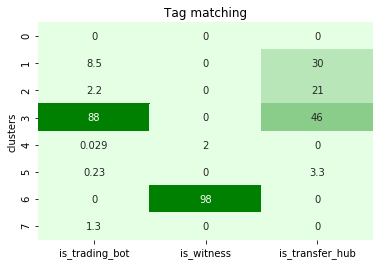

In [6]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

ax = sns.heatmap(stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']], annot=True, cmap=sns.light_palette("green"), cbar=False)
ax.set_title("Tag matching")

In [ ]:
tag_matching = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / x.sum() * 100))
cluster_fill = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / stats['count'] * 100))


In [25]:
tag_matching

is_trading_bot  is_witness  is_transfer_hub
clusters                                             
0               0.000000    0.000000         0.000000
1               8.479448    0.000000        29.508197
2               2.184536    0.000000        21.311475
3              87.783846    0.000000        45.901639
4               0.028744    2.040816         0.000000
5               0.229951    0.000000         3.278689
6               0.000000   97.959184         0.000000
7               1.293475    0.000000         0.000000

Text(0.5, 1.0, 'Cluster accuracy')

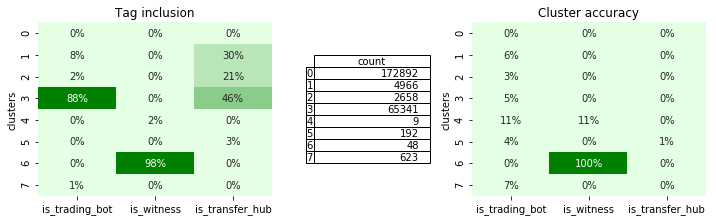

In [53]:
import matplotlib.pyplot as plt

fig,(ax1,tabax, ax2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2, 1, 2]}, figsize=(10,3))
fig.tight_layout()

tag_matching = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / x.sum()))
cluster_fill = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / stats['count']))

ax1 = sns.heatmap(tag_matching, annot=True, cmap=sns.light_palette("green"), cbar=False, ax=ax1, fmt='.0%')
ax1.set_title("Tag inclusion")

tabax.axis("off")
tabax.table(cellText=stats[['count']].values,
          rowLabels=stats.index,
          colLabels=['count'],
          cellLoc = 'right', rowLoc = 'center',
          loc='center')

ax2 = sns.heatmap(cluster_fill, annot=True, cmap=sns.light_palette("green"), cbar=False, ax=ax2, fmt='.0%')
ax2.set_title("Cluster accuracy")

In [9]:
clusters.mean()

auths_owner_count  auths_active_count  vote_num_witness  \
clusters                                                            
0                  1.014963            1.018769          0.001822   
1                  1.069472            1.089609          0.048933   
2                  1.141084            1.079759          0.009406   
3                  1.017279            1.030655          0.005571   
4                  1.555556            1.666667          1.111111   
5                  1.307292            1.333333          2.380208   
6                  1.166667            1.104167          8.354167   
7                  1.133226            1.181380         11.091493   

          vote_num_committee  vote_num_votes  whitelisting_accounts  \
clusters                                                              
0                   0.000509        0.004905               0.000000   
1                   0.024366        0.293798               0.012284   
2                   0.005267        0.061701               0.744921   
3                   0.002357        0.024150               0.000000   
4                   0.666667        4.666667               0.222222   
5                   0.921875        4.625000               0.260417   
6                   3.041667       13.729167               0.104167   
7                   4.990369       20.375602               0.072231   

          blacklisting_accounts  whitelisted_accounts  blacklisted_accounts  \
clusters                                                                      
0                      0.000000              0.000000              0.000006   
1                      0.013693              0.020942              0.014096   
2                      0.363807              0.628668              0.341986   
3                      0.000000              0.000000              0.000000   
4                      0.000000              0.000000              0.000000   
5                      0.161458              4.645833              0.526042   
6                      0.000000              0.166667              0.062500   
7                      0.049759              0.057785              0.182986   

              total_ops    removed_ops  lifetime_fees_paid  \
clusters                                                     
0             31.104360       2.984915        3.888742e+05   
1          30151.899315   30071.766814        4.211733e+08   
2           7994.827314    7925.817908        3.930929e+07   
3           9517.717436    9417.868306        4.270355e+06   
4           2128.333333    2041.444444        4.089005e+07   
5         103311.718750  103213.427083        1.197688e+10   
6         834543.479167  834443.479167        3.262740e+09   
7          10974.247191   10888.157303        3.658642e+08   

          total_core_in_orders  core_in_balance  pending_fees  \
clusters                                                        
0                 5.880452e+06     5.239149e+08           0.0   
1                 4.771378e+09     6.137195e+09           0.0   
2                 5.378702e+08     1.270519e+10           0.0   
3                 3.391074e+08     4.969269e+08           0.0   
4                 6.125552e+08     2.643011e+07           0.0   
5                 2.831777e+09     2.551377e+09           0.0   
6                 1.803420e+09     1.477114e+10           0.0   
7                 7.700557e+09     4.326631e+09           0.0   

          pending_vested_fees  days_since_last_vote  nb_assets_owned  \
clusters                                                               
0                    4.166624          17610.972948         2.885102   
1                  382.691099          13667.160491        24.876963   
2                 1908.171181          11831.975169        15.712190   
3                  161.121470          17182.559082        22.358733   
4                    0.000000           8075.666667        11.666667   
5                10840.802083           8

In [17]:
df.query("vote_num_votes > 0").groupby("clusters").size()

clusters
0    474
1    538
2     88
3    793
4      5
5     53
6     26
7    623
dtype: int64

In [16]:
df.nlargest(100, "referree").groupby("clusters").size()

clusters
1    50
5    38
6     3
7     9
dtype: int64

In [28]:
df.query("clusters == 3")

id           name  auths_owner_count  auths_active_count  \
118         1.2.486           jojo                  1                   1   
127        1.2.1004            nsn                  1                   1   
137         1.2.642      minervato                  1                   1   
154         1.2.763             kk                  1                   1   
159         1.2.787        offfice                  1                   1   
179         1.2.881     litecoiner                  1                   1   
181         1.2.887   blockchainer                  1                   1   
184         1.2.903     dogecoiner                  1                   1   
186         1.2.912          btser                  1                   1   
195         1.2.978       invictus                  1                   3   
203        1.2.1281         needle                  1                   1   
214        1.2.1509            aab                  1                   1   
217        1.2.1592           ctrl                  1                   1   
222        1.2.1634           cool                  1                   1   
226        1.2.1692         copper                  1                   1   
238        1.2.1771    buckfankers                  1                   1   
240        1.2.1853            mac                  1                   1   
243        1.2.1867      intmaster                  1                   1   
244        1.2.1873          missu                  1                   1   
245        1.2.1894    rzshenwei01                  3                   3   
251        1.2.2013      btsxchina                  1                   1   
268        1.2.2181           lao1                  1                   1   
269        1.2.2187           lao3                  1                   1   
270        1.2.2189           lao4                  1                   1   
282        1.2.2344          mayun                  1                   1   
285        1.2.2371           geek                  1                   1   
298        1.2.2732            a-a                  1                   1   
307        1.2.2827         xangle                  1                   1   
310        1.2.2847         bitbts                  1                   1   
312        1.2.2861           nice                  1                   1   
...             ...            ...                ...                 ...   
245782  1.2.1602283    dooby-jones                  1                   1   
245834  1.2.1602460         raff-1                  1                   1   
245849  1.2.1602546      birgece12                  1                   1   
245863  1.2.1602603       pberry20                  1                   1   
245948  1.2.1602904  smalldwarf666                  1                   1   
245961  1.2.1602939   smart-lab-mm                  1                   1   
245994  1.2.1603064     bigroygun1                  1                   1   
246011  1.2.1603138     day-trade1                  1                   1   
246016  1.2.1603151      fructhis1                  1                   1   
246017  1.2.1603160     gud-trader                  1                   1   
246042  1.2.1603231     dominick12                  1                   1   
246056  1.2.1603301   iamnotlevi85                  1                   1   
246091  1.2.1603465      crazy4you                  1                   1   
246097  1.2.1603481         crj123                  1                   1   
246101  1.2.1603490         mybot4                  1                   1   
246126  1.2.1603657        voron19                  1                   1   
246137  1.2.1603725    nanograma-1                  1                   1   
246169  1.2.1603818     ahurt4morn                  1                   1   
246170  1.2.1603820   flaunfever78                  1                   1   
246186  1.2.1603872     davinci478                  1                   1   
246191  1.2.1

/home/zapata/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/zapata/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/zapata/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/zapata/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

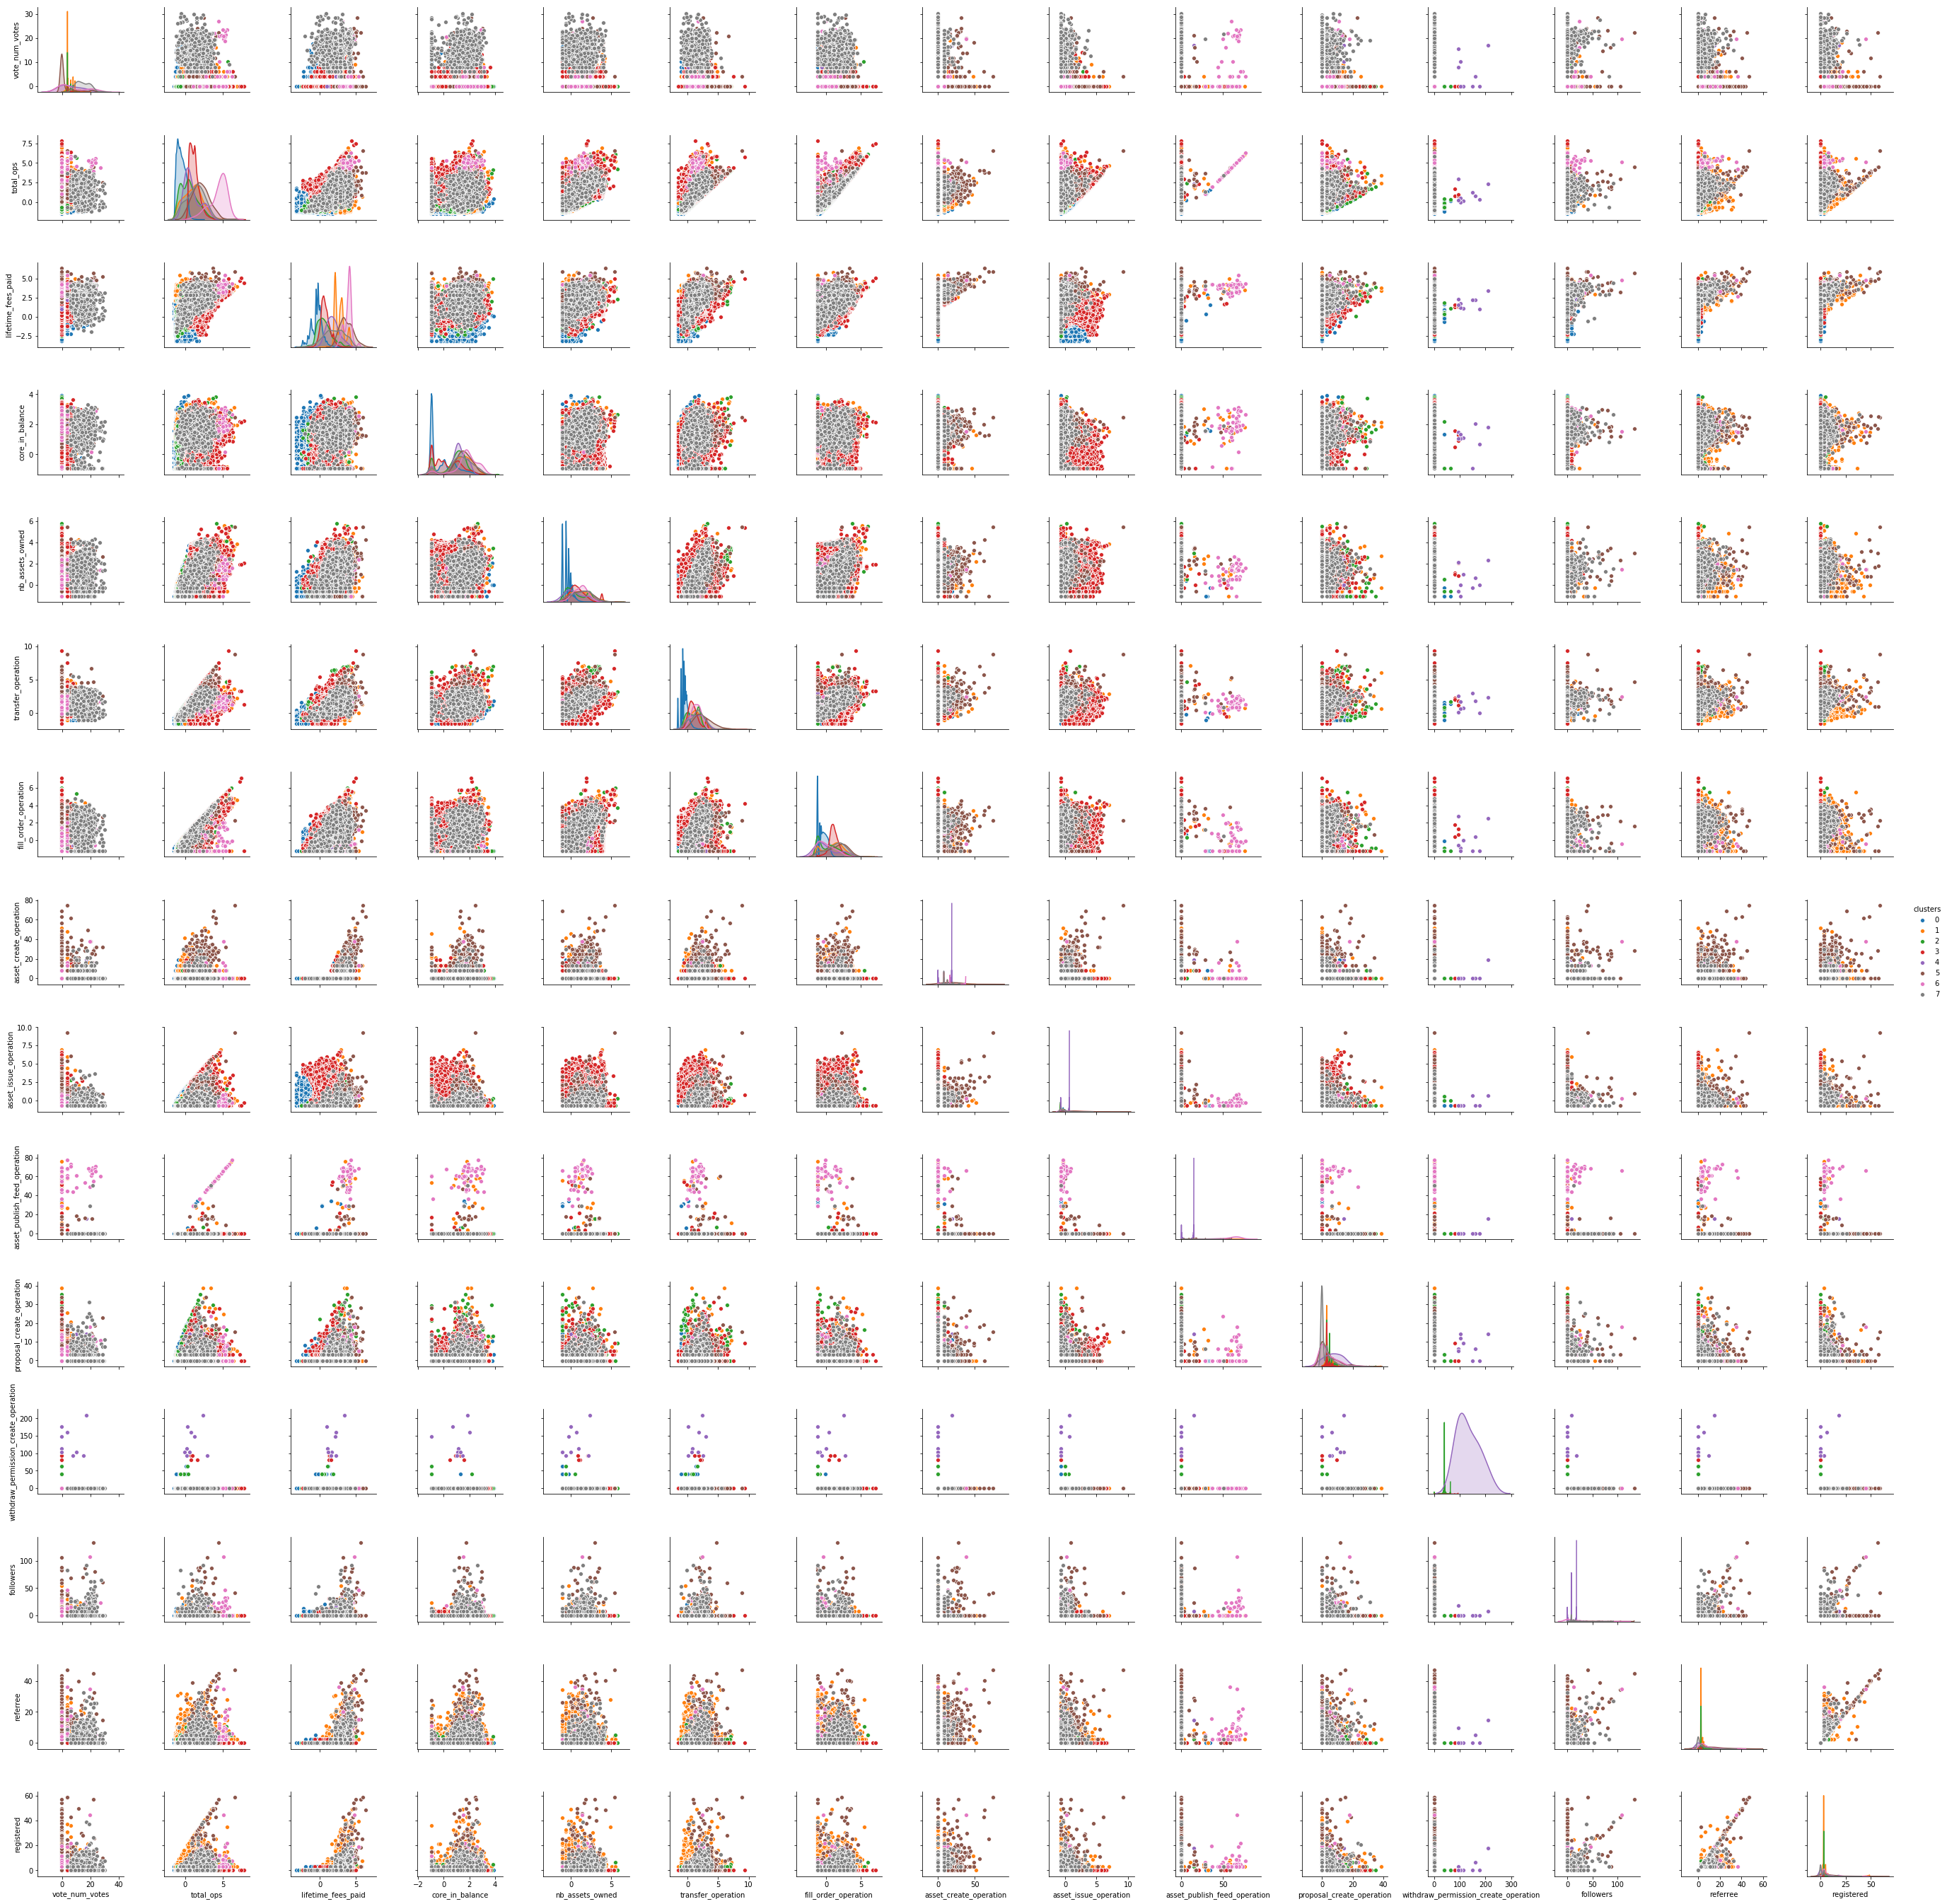

In [15]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline

main_features = ['vote_num_votes', 'total_ops', 'lifetime_fees_paid', 'core_in_balance', 'nb_assets_owned', 'transfer_operation', 'fill_order_operation', 'asset_create_operation', 'asset_issue_operation', 'asset_publish_feed_operation', 'proposal_create_operation', 'withdraw_permission_create_operation', 'followers', 'referree', 'registered']
#main_features = ['total_ops', 'core_in_balance', 'nb_assets_owned']

x = df[main_features].values
pipe = Pipeline([('log', FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True) ),
                 ('scale', StandardScaler() )
                 ])
x_scaled = pipe.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=main_features)
df_scaled['clusters'] = df['clusters']

#df_scaled
sns.pairplot(df_scaled, hue="clusters", vars=main_features)